# Introduction to Latin Square Design
# Controlling for Two Blocking Factors
## Dr Austin R Brown
## School of Data Science and Analytics
### Kennesaw State University

In [5]:
# === COURSE REPO SETUP === #

# 1. ENTER your GitHub username (the one that owns your fork)
github_username = "lasyamattaparthy"

# 2. Name of the repo (don't change unless your fork name is different)
#epo_name = "STAT-7220-Applied-Experimental-Design"

# 3. Build the full repo URL for cloning
repo_url = f"https://github.com/{github_username}/{repo_name}.git"

import os

# --- Detect if we're already in a repo ---
cwd = os.getcwd()
if cwd.endswith(repo_name):
    print(f"✅ Already inside repo folder: {cwd}")
else:
    # --- If the repo folder exists, check if it's nested ---
    if os.path.exists(repo_name):
        print(f"⚠️ Found existing folder '{repo_name}'. Skipping clone to avoid nesting.")
    else:
        print(f"📥 Cloning repo from {repo_url}...")
        os.system(f"git clone {repo_url}")

    # --- Change to repo directory ---
    if os.path.exists(repo_name):
        os.chdir(repo_name)
        print(f"📂 Changed directory to: {os.getcwd()}")
    else:
        print("❌ ERROR: Repo folder not found. Please check your GitHub username.")

# --- Check if this is the instructor's repo instead of student's fork ---
# This command needs to be run from within the repository directory
remote_url = os.popen("git config --get remote.origin.url").read().strip()

if "abrown9008" in remote_url:
   print("⚠️ WARNING: You are working in the instructor's repo, not your fork!")
   print("💡 Please fork the repo to your own account and update `github_username` above.")
else:
    print(f"🔗 Connected to fork at: {remote_url}")

# Set Today's Directory #

today_dir = "Random Block Design and Latin Squares"
os.chdir(today_dir)
print(f"📂 Changed directory to: {os.getcwd()}")

📥 Cloning repo from https://github.com/lasyamattaparthy/STAT-7220-Applied-Experimental-Design.git...
📂 Changed directory to: /content/STAT-7220-Applied-Experimental-Design/Random Block Design and Latin Squares/STAT-7220-Applied-Experimental-Design
🔗 Connected to fork at: https://github.com/lasyamattaparthy/STAT-7220-Applied-Experimental-Design.git
📂 Changed directory to: /content/STAT-7220-Applied-Experimental-Design/Random Block Design and Latin Squares/STAT-7220-Applied-Experimental-Design/Random Block Design and Latin Squares


## Introduction

- So far, we've learned about [Completely Randomized Designs](https://github.com/abrown9008/STAT-7220-Applied-Experimental-Design/blob/main/Comparative%20Experiments/Introduction%20to%20Completely%20Randomized%20Designs.ipynb) and [Randomized Block Designs](https://github.com/abrown9008/STAT-7220-Applied-Experimental-Design/blob/main/Random%20Block%20Design%20and%20Latin%20Squares/Intro-to-Randomized-Block-Design.ipynb).

- In CRD, we assumed we had one treatment factor and we randomly assigned treatments to experimental units.

    - We didn't account for any nuisance or blocking factors.

- In RBD, we assumed there may be one nuisance factor that we know and can control for.

    - We blocked the experimental units based on this factor.

- But in some cases, we may have more than one nuisance factor.

    - Suppose we have two, for instance. What do we do then?

## Example: Comparing Dog Toy Durability

- Let's reconsider the dog toy durability experiment we had worked on previously. Let's suppose we have three different machines which can make one of three different rubber formulations for our dog toys (say, F1, F2, and F3). The rubber formulation is our main treatment factor, but we would also want to control for any variation attributable to differences in machine. So *machine will serve as a blocking factor*.

- However, these machines require someone to operate them. Let's say we also have three operators trained to operate our machines. It would also be important to control for variation attributable to differences in operator as well. So *operator* will be our second blocking factor.

- So to recap, we will be using a hydraulic press to measure the PSI of our dog toys when the toy breaks (**outcome**). We are interested in comparing the mean PSI across the three rubber formulations (**treatment effect**) controlling for the machine and operator (**blocking factors**).

## Study Design

- The type of design we will use to account for **two blocking factors**, both Machine and Operator, is called a ***Latin Square Design***.

    - Note, unlike RBD, the number of levels of the treatment and blocking factors **must be equal to produce the "Square" of "Latin Square"**

- Our overall research question will largely stay the same from the CRD study: "Is there evidence for a difference in mean breaking PSI between the rubber formulations controlling for machine and operator effects?"

- We will have 3 treatments (F1, F2, and F3), 3 levels for our first block (Machine), and 3 levels for our second block (Operator).

    - This is called a $3\times 3$ Latin Square.
    - Again, note, for us to have a Latin Square Design (LSD), **the number of levels in the treatment factor and the two blocking factors must be equal.**

- Each level of each blocking factor will receive each treatment exactly once.

    - This is the key feature of a Latin Square Design.

- It is sometimes helpful to visualize the design of a Latin Square. Here is a visual representation of the design we will use for our study:

**Latin Square Study Design**

| **Machine** | **Operator 1** | **Operator 2** | **Operator 3** |
|-------------|----------------|----------------|----------------|
| **1**       | F1             | F2             | F3             |
| **2**       | F2             | F3             | F1             |
| **3**       | F3             | F1             | F2             |


- Note, in a LSD, the number of replicates per square is one (i.e., $r=1$). So for a $3\times 3$ design, we have a total of $N=9$ observations.

    - This is partly why LSD is considered an efficient design. We can control sources of variability and make our treatment comparison with very few observations.

## Descriptive Analysis

- As before, we can begin with our descriptive analysis, starting with the calculation of the means and standard deviations of the formulations:

In [6]:
## Import Necessary Packages ##
import pandas as pd
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd

## Read in Latin Square Dog Toys Data ##

dog_toys = pd.read_excel("Latin Square Dog Toys.xlsx")

## Data Integrity Check ##

print(dog_toys.info())

## Calcualte Means and Standard Deviations ##

sum_stats = dog_toys.groupby("Formulation")["PSI"].agg(['mean','std'])

print(sum_stats)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Machine      9 non-null      object 
 1   Operator     9 non-null      object 
 2   Formulation  9 non-null      object 
 3   PSI          9 non-null      float64
dtypes: float64(1), object(3)
memory usage: 420.0+ bytes
None
                   mean       std
Formulation                      
F1           265.693533  2.638557
F2           273.585900  2.063751
F3           294.298500  2.487777


- From these results, it looks like Formulation 3 provides the greatest durability compared to the other two formulations. Our mean standard deviation is about 2.4 PSI. We can see that the difference between F3 and F2 is about 20, which is roughly $10\sigma$. The difference between F3 and F1 is about 30, which is roughly $15\sigma$. Finally, the difference between F2 and F1 is about 8, which is roughly $3\sigma$. In sum, it looks like there are some pretty large differences between the formulations.

- Now, we can visualize this information with a boxplot as before.

- Note, I'm going to just look at boxplots of the formulations rather than partition them into subgroups based on operator and machine.

    - The reason for this is that we only have one observation per combination of treatment and blocking effects which makes a boxplot not terribly informative.

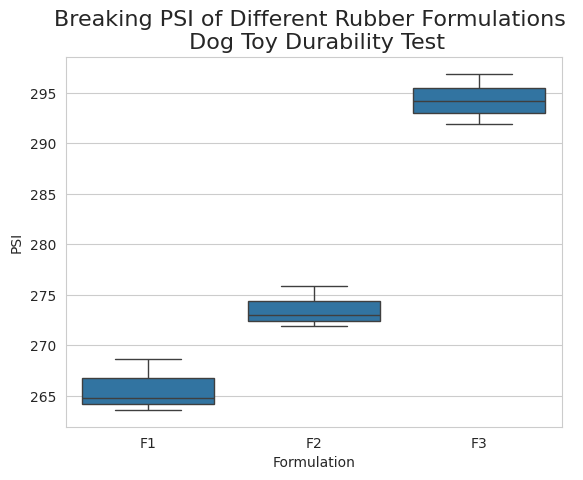

In [8]:
## Build a Boxplot ##

## Set up style ##

sns.set_style("whitegrid")

## Specify Aesthetics ##

sns.boxplot(
    data=dog_toys,
    x='Formulation',
    y='PSI'
)

## Add labels and titles ##

plt.title("Breaking PSI of Different Rubber Formulations \n Dog Toy Durability Test",
          loc='center',
          fontsize=16)

## Show the plot ##

plt.show()

- As shown here, we have very clear separation between Formulation 3 and the other two Formulations.

    - We also have very clear separation between F2 and F1.

- In general, it seems like we have very low amounts of within group variation. But since none of the boxes overlap at all, this may indicate that all three formulations' breaking PSI differ substantially.

- Let's put this to the test by using our F-test. But what does this look like for a LSD?

### Inferential Analysis

- For a $t\times t$ LSD, our model is:

$$ y_{ijk} = \mu + \alpha_i + \tau_j + \beta_k + \varepsilon_{ijk} $$

- Here:
    - $\mu$ still denotes the overall mean,
    - $\alpha_i$ is the ith effect of the first blocking variable,
    - $\tau_j$ is the jth treatment effect,
    - $\beta_k$ is the kth effect of the second blocking variable, and
    - $\varepsilon_{ijk}$ is the random error term as before.

- Recall from the lecture on RBD that the Fundamental ANOVA Identity tells us that total variation, as measured by SSTotal, can be partitioned into Explained Variation and Unexplained Variation.

- In LSD, that means:

$$ SSTotal = SSTreat + SSBlock_1 + SSBlock_2 + SSE $$

**LSD ANOVA Table**

| **Source**   | **df**                  | **SS**             | **MS**                                         | **F-Statistic**                                  |
|--------------|-------------------------|--------------------|------------------------------------------------|--------------------------------------------------|
| Treatments   | $t - 1$                 | $SS_{\text{Treat}}$   | $\frac{\text{SS}_{\text{Treat}}}{t - 1}$       | $\frac{\text{MS}_{\text{Treat}}}{\text{MS}_{\text{Error}}}$ |
| Block 1      | $t - 1$                 | $SSBlock_{1}$         | $\frac{\text{SSBlock}_{1}}{t - 1}$             | $\frac{\text{MS}_{\text{B1}}}{\text{MS}_{\text{Error}}}$     |
| Block 2      | $t - 1$                 | $SSBlock_{2}$         | $\frac{\text{SSBlock}_{2}}{t - 1}$             | $\frac{\text{MS}_{\text{B2}}}{\text{MS}_{\text{Error}}}$     |
| Error        | $(t - 1)(t - 2)$        | $SS_{\text{Error}}$   | $\frac{\text{SS}_{\text{Error}}}{df_{\text{Error}}}$ | —                                                  |
| Total        | $t^2 - 1$               | $SS_{\text{Total}}$   | —                                              | —                                                  |


- Recall from RBD, we only care about the hypothesis test for our treatment effect:

$$ \begin{align}
H_0&: \mu_1 = \mu_2 = \dots = \mu_t \\
H_1&: \text{At least two group means differ}
\end{align}
$$

- If $F_{stat} = MS_{Treat}/MSE > F_{CV}$ for some given value of $\alpha$, then this indicates that the data more strongly support the alternative hypothesis.

- After we've fit the model using the `ols` function and checked our assumptions of normality and constant variance, we can go ahead and perform our omnibus F-test as before:

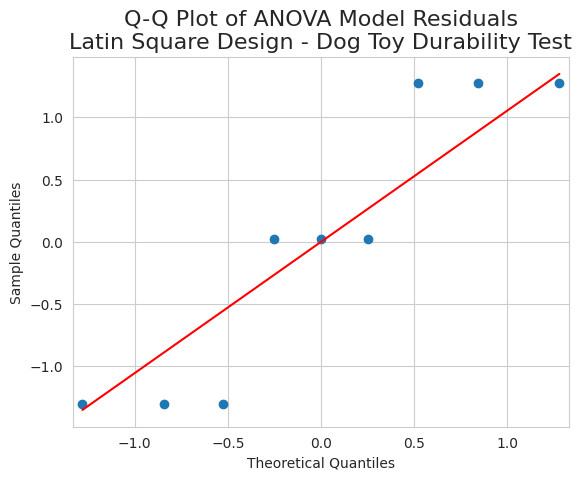

Shapiro-Wilk Test Statistic: 0.8228, p-value: 0.0371
❌ Residuals do not appear to be normally distributed (reject H0).


In [9]:
## Fit ANOVA Model ##

lsd_mod = ols("PSI~Formulation+Machine+Operator",data=dog_toys).fit()

## Extract Residuals ##

residuals = lsd_mod.resid

## Plot QQ-Plot with seaborn ##

sm.qqplot(residuals, line ='s')
plt.title("Q-Q Plot of ANOVA Model Residuals\nLatin Square Design - Dog Toy Durability Test",
          loc='center',
          fontsize=16)
plt.show()

## S-W Test ##

sw = stats.shapiro(residuals)

## Extract Test Stat & p-value ##
sw_stat = sw.statistic
sw_pval = sw.pvalue
print(f"Shapiro-Wilk Test Statistic: {sw_stat:.4f}, p-value: {sw_pval:.4f}")
if sw_pval > 0.05:
    print("✅ Residuals appear to be normally distributed (fail to reject H0).")
else:
    print("❌ Residuals do not appear to be normally distributed (reject H0).")

- Here, because we have so few observations, a single observation can greatly sway our results. So we need to interpret with a bit of caution.

- In the QQ-Plot, generally the points follow the center diagonal line. There is some deviation but not severe.

- The p-value associated with the S-W Test of Normality indicates that the data more strongly support the alternative hypothesis of non-normality.

- However, since we have so few data points, and since the QQ-Plot generally looks good, I'm going to conclude that the normality assumption is reasonably (emphasis on reasonably) met.

- Let's move onto constant variance:

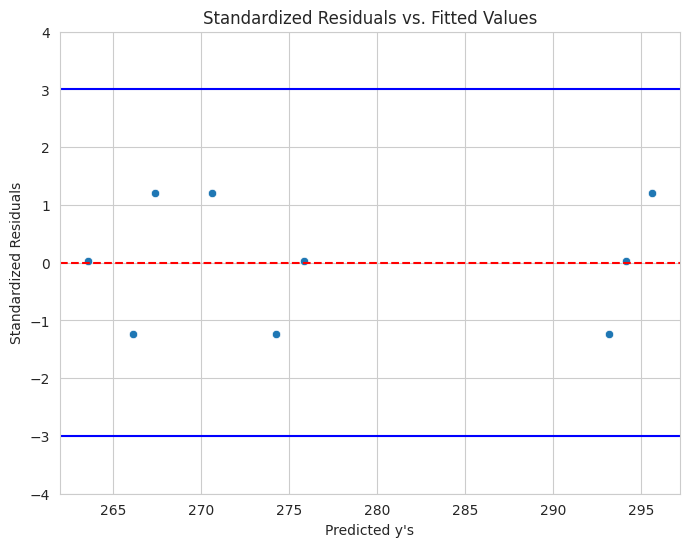

F-statistic: 0.0
F p-value: 1.0
✅ Residuals appear to have constant variance (fail to reject H0).


In [10]:
## Assessing Constant Variance ##

## Scatterplot of Standardized Residuals to Fitted Values ##

## Obtain Standardized Residuals ##

standardized_residuals = lsd_mod.get_influence().resid_studentized_internal

## Get the fitted values ##

fitted_values = lsd_mod.fittedvalues

## Create the plot ##

plt.figure(figsize=(8, 6))
sns.scatterplot(x=fitted_values, y=standardized_residuals)
plt.axhline(y=0, linestyle='dashed', color='red')
plt.axhline(y=3, color='blue')
plt.axhline(y=-3, color='blue')
plt.xlabel("Predicted y's")
plt.ylabel("Standardized Residuals")
plt.title("Standardized Residuals vs. Fitted Values")
plt.style.use('classic')
plt.show()

## B-P Test ##

## Import necessary function: ##

from statsmodels.stats.diagnostic import het_breuschpagan

## Run B-P Test ##

bp_test = het_breuschpagan(lsd_mod.resid,lsd_mod.model.exog)

## Extract F-statistic ##

f_statistic = bp_test[2]

## Extract its P-Value ##

f_p_value = bp_test[3]

print(f"F-statistic: {f_statistic}")
print(f"F p-value: {f_p_value}")
if f_p_value > 0.05:
    print("✅ Residuals appear to have constant variance (fail to reject H0).")
else:
    print("❌ Residuals do not appear to have constant variance (reject H0).")

- Here, we have a little rosier picture. In the scatterplot:
    - The points are randomly scattered about 0
    - The heights of the vertical lines are generally the same length
    - No obvious outliers (above +3 or below -3)

- The p-value associated with the B-P test indicates that the data more strongly support the null hypothesis of constant variance.

- Thus, for the above reasons, the constant variance assumption is reasonably met and we can proceed with making inference safely:

In [11]:
## Print ANOVA Table ##
lsd_tab = sm.stats.anova_lm(lsd_mod,typ=3)
## Add Significance Column ##
lsd_tab['Sig'] = np.where(lsd_tab['PR(>F)']<0.05,'Yes','No')
## Print only the main effect and blocking factor rows ##
print(lsd_tab.loc[['Formulation','Machine','Operator']])

                  sum_sq   df           F    PR(>F)  Sig
Formulation  1309.545368  2.0  131.360633  0.007555  Yes
Machine         5.148951  2.0    0.516492  0.659417   No
Operator       19.702128  2.0    1.976323  0.335985   No


- As was the case with RBD, we ignore the tests associated with our blocking factors.

- Examining our main effect, the p-value associated with this factor, `Formulation`, is 0.008.

- This indicates that the data more strongly support the alternative hypothesis, indicating that at least two of our formulations may have meaningfully differing mean breaking PSI values, from a statistical perspective.

    - We had deduced this conclusion from the boxplot.

- To determine which group means may have statistically meaningful differences, we can use Tukey's HSD post hoc test as before:

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
    F1     F2   7.8924 0.0165  1.8572 13.9275   True
    F1     F3   28.605    0.0 22.5698 34.6401   True
    F2     F3  20.7126 0.0001 14.6774 26.7478   True
----------------------------------------------------


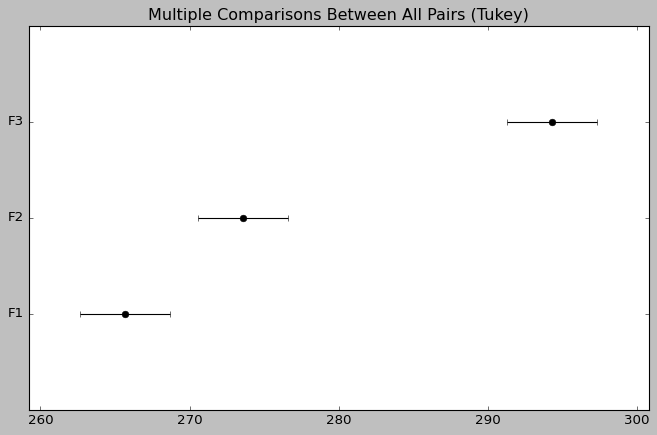

In [12]:
## Tukey's HSD Function Already Imported Above ##

tukey_result = pairwise_tukeyhsd(endog=dog_toys['PSI'], groups=dog_toys['Formulation'],
                                 alpha=0.05)

## Print Tukey Visual Summary ##

tukey_result.plot_simultaneous()

print(tukey_result)

- From the output, we can see that the mean PSI for F3 may possess statistically meaningful differences from F1 and F2, controlling for operator and machine effects.

- F1 and F2 may also have a statistically meaningful difference from each other, controlling for operator and machine effects, at the 0.05 level

- Contextually, if we were making the choice between the three formulations based on durability, we should probably go with Formulation 3.

## Final Thoughts

- The LSD is an efficient design for controlling two nuisance factors.
    - We can extend this to three blocking factors in the ***Greco-Latin Square Design***.

- However, it does have some limitations. First, like RBD, we assume no interaction between the blocks and the treatment effect. This may not always be reasonable.

- Second, the "Square" of "Latin Square" restricts the number of levels of our treatment and blocking effects.

- Finally, while we can increase the number of replicates through multiple runs of the same experiments, we then have to account for this in a Greco-Latin Square type of design as the run of the experiment can be considered another block.

- So in short, while LSD has some nice features, it also has disadvantages.

- We will talk about alternatives as the semester progresses.